Repo prep

In [ ]:
!mkdir ./data/widerface;mkdir ./data/widerface/train/;mkdir ./data/widerface/val/ 

In [ ]:
!unzip /content/drive/My*Drive/widerface/WIDER_train.zip && mv ./WIDER_train/images/ ./data/widerface/train; unzip /content/drive/My*Drive/widerface/WIDER_val.zip && mv ./WIDER_val/images/ ./data/widerface/val

Streaming output truncated to the last 5000 lines.
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_473.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_474.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_476.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_478.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_494.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sport

In [ ]:
!cp /content/drive/My*Drive/widerface/train/label.txt ./data/widerface/train/; cp /content/drive/My*Drive/widerface/val/label.txt ./data/widerface/val/

In [ ]:
!cp -r /content/drive/My*Drive/checkpoints ./

check new model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/retinaface-tf2/frozen_model')
model.summary()

Model: "RetinaFaceModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 640, 640, 3) 0                                            
__________________________________________________________________________________________________
tf_op_layer_RealDiv (TensorFlow (None, 640, 640, 3)  0           input_image[0][0]                
__________________________________________________________________________________________________
tf_op_layer_Sub (TensorFlowOpLa (None, 640, 640, 3)  0           tf_op_layer_RealDiv[0][0]        
__________________________________________________________________________________________________
MobileNetV2_extrator (Functiona ((None, 80, 80, 32), 1364864     tf_op_layer_Sub[0][0]            
____________________________________________________________________________________

In [ ]:
TFLITE_MODEL = "try_lite_model.tflite"

In [ ]:
run_model = tf.function(lambda x : model(x))

In [ ]:
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

In [ ]:
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

6195096

In [ ]:
TFLITE_QUANT_MODEL = "try_model_quant.tflite"

In [ ]:
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)


1680576

In [ ]:
!ls -lh

total 7.6M
drwx------ 3 root root 4.0K Aug  8 18:39 checkpoints
drwxr-xr-x 2 root root 4.0K Aug  8 18:39 configs
drwxr-xr-x 2 root root 4.0K Aug  8 18:39 data
-rw-r--r-- 1 root root 2.6K Aug  8 18:39 dataset_checker.py
-rw-r--r-- 1 root root  219 Aug  8 18:39 environment.yml
drwx------ 4 root root 4.0K Aug  8 18:40 frozen_model
-rw-r--r-- 1 root root 1.1K Aug  8 18:39 LICENSE
drwxr-xr-x 2 root root 4.0K Aug  8 18:39 modules
drwxr-xr-x 2 root root 4.0K Aug  8 18:39 notebooks
drwxr-xr-x 2 root root 4.0K Aug  8 18:39 photo
-rw-r--r-- 1 root root 9.7K Aug  8 18:39 README.md
-rw-r--r-- 1 root root   75 Aug  8 18:39 requirements.txt
-rw-r--r-- 1 root root 4.6K Aug  8 18:39 test.py
-rw-r--r-- 1 root root 6.0K Aug  8 18:39 test_widerface.py
-rw-r--r-- 1 root root 4.4K Aug  8 18:39 train.py
-rw-r--r-- 1 root root 6.0M Aug  8 18:46 try_lite_model.tflite
-rw-r--r-- 1 root root 1.7M Aug  8 18:48 try_model_quant.tflite
drwxr-xr-x 3 root root 4.0K Aug  8 18:39 widerface_evaluate


In [ ]:
tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
#print(input_details)
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
#print(output_details)
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

print("\nname:", output_details[1]['name'])
print("shape:", output_details[1]['shape'])
print("type:", output_details[1]['dtype'])

print("\nname:", output_details[2]['name'])
print("shape:", output_details[2]['shape'])
print("type:", output_details[2]['dtype'])

== Input details ==
name: x
shape: [  1 640 640   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 1 4]
type: <class 'numpy.float32'>

name: Identity_1
shape: [ 1  1 10]
type: <class 'numpy.float32'>

name: Identity_2
shape: [1 1 2]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.allocate_tensors()

In [ ]:
import cv2

In [ ]:
image = "/content/retinaface-tf2/data/0_Parade_marchingband_1_149.jpg"

In [ ]:
x = cv2.imread(image)

In [ ]:
img = tf.image.convert_image_dtype(x, dtype=tf.float32, saturate=False)

In [ ]:
print(img)

tf.Tensor(
[[[0.7372549  0.7568628  0.81568635]
  [0.72156864 0.7411765  0.8000001 ]
  [0.69411767 0.7058824  0.76470596]
  ...
  [0.26666668 0.3647059  0.7725491 ]
  [0.28627452 0.38431376 0.79215693]
  [0.3019608  0.40000004 0.8078432 ]]

 [[0.6862745  0.7137255  0.7803922 ]
  [0.65882355 0.6862745  0.75294125]
  [0.63529414 0.6509804  0.72156864]
  ...
  [0.28235295 0.3803922  0.78823537]
  [0.28627452 0.38431376 0.79215693]
  [0.28627452 0.38431376 0.79215693]]

 [[0.69803923 0.7372549  0.8078432 ]
  [0.654902   0.69411767 0.76470596]
  [0.62352943 0.6509804  0.7254902 ]
  ...
  [0.29411766 0.3921569  0.8000001 ]
  [0.28627452 0.38431376 0.79215693]
  [0.27058825 0.36862746 0.77647066]]

 ...

 [[0.31764707 0.654902   0.5372549 ]
  [0.31764707 0.67058825 0.5529412 ]
  [0.32941177 0.70980394 0.58431375]
  ...
  [0.1137255  0.63529414 0.50980395]
  [0.09803922 0.6039216  0.48235297]
  [0.11764707 0.62352943 0.5019608 ]]

 [[0.29411766 0.62352943 0.5137255 ]
  [0.30588236 0.6392157  0

In [ ]:
imag = tf.expand_dims(img, axis=0).shape.as_list()

In [ ]:
tf.dtypes.cast(imag, tf.float32)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.000e+00, 6.840e+02, 1.024e+03, 3.000e+00], dtype=float32)>

In [ ]:
print(imag)

[1, 684, 1024, 3]


In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    directory=r"/content/retinaface-tf2/data/widerface/val",
    target_size=(640,640),
    batch_size=1,
    shuffle=True,
    
)

Found 3226 images belonging to 1 classes.


In [ ]:
print(valid_generator)

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (1, 640, 640, 3)


In [ ]:
print(val_image_batch)

[[[[0.15294118 0.12156864 0.16470589]
   [0.1137255  0.08627451 0.11764707]
   [0.09019608 0.06666667 0.08235294]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.14509805 0.1137255  0.15686275]
   [0.10196079 0.07450981 0.10588236]
   [0.07843138 0.05490196 0.07058824]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.14117648 0.10980393 0.15294118]
   [0.09803922 0.07058824 0.10196079]
   [0.07450981 0.0509804  0.06666667]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.19607845 0.15294118 0.18431373]
   [0.12941177 0.08627451 0.10980393]
   [0.07843138 0.04313726 0.0627451 ]
   ...
   [0.7607844  0.73333335 0.7960785 ]
   [0.8941177  0.86666673 0.9294118 ]
   [1.         0.9803922  1.        ]]

  [[0.19607845 0.15294118 0.18431373]
   [0.1

TypeError: ignored

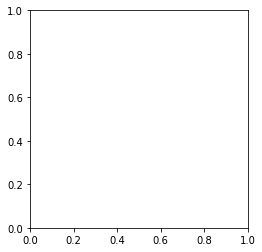

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(val_image_batch)

In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions_bbox = tflite_interpreter.get_tensor(output_details[0]['index'])
tflite_model_predictions_lndm = tflite_interpreter.get_tensor(output_details[1]['index'])
tflite_model_predictions_con = tflite_interpreter.get_tensor(output_details[2]['index'])
print("\nshape:", tflite_model_predictions_bbox.shape)
print("\nshape:", tflite_model_predictions_lndm.shape)
print("\nshape:", tflite_model_predictions_con.shape)


shape: (1, 16800, 4)

shape: (1, 16800, 10)

shape: (1, 16800, 2)


In [ ]:
print(tflite_model_predictions[0][:])

[[-9.16957796e-01  6.75299764e-01 -1.17710836e-01  2.71037996e-01]
 [ 3.85491878e-01 -1.67732596e+00 -7.67600417e-01  3.04834813e-01]
 [-7.78479040e-01  1.22440541e+00 -3.24585289e-01  7.38635778e-01]
 ...
 [-1.57493973e+00 -4.55846749e-02 -6.17921233e-01  6.78959370e-01]
 [-4.69955355e-01 -7.94121413e-04  1.42933941e+00  1.54238343e+00]
 [-1.00861824e+00  3.11052557e-02 -1.71980274e+00  3.62852454e-01]]
